In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
h = np.array(pd.read_csv("results/algebra_valid.txt", header=None, skiprows=0))
y = np.array(pd.read_csv("results/algebra_valid_y.txt", header=None, skiprows=0))

In [3]:
# A simple zero cross function for the derivative

def jitter(data):
    ydim,xdim = data.shape
#     print(xdim)

    out = []
    
    for i in range(xdim):
        current = data[0:ydim-1,i]
        current_1 =data[1:ydim,i]
        
        diffs = current_1-current
        diffs_1 = diffs[1:]
        diffs = diffs[:-1]

        a = np.logical_and((diffs > 0),(diffs_1 < 0))
        aa = np.logical_and((diffs < 0),(diffs_1 > 0))

        jit = np.logical_or(a,aa)

        out.append([jit,sum(jit)])
    return out

yyyy = jitter(y)
hhhh = jitter(h)

NameError: name 'y' is not defined

In [17]:
oo = np.loadtxt("generate/algebra_output_100000_2.txt",delimiter=",", max_rows=10000)
ii = np.loadtxt("generate/algebra_input_100000_2.txt",delimiter=",", max_rows=10000)

gg = np.loadtxt("generate/group_output_100000_2.txt",delimiter=",", max_rows=10000)
pp = np.loadtxt("generate/group_input_100000_2.txt",delimiter=",", max_rows=10000)

In [20]:
print(oo.shape)
print(ii.shape)

(10000, 186)
(10000, 3041)


In [6]:
from clifford import pga
from math import e, pi

C:\Users\levik\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
# functions to compare and implement the motors of pga

In [7]:
def algebra_motor_compare(algebra, algebra_out):
#     x_g,y_g = group.shape
    x_a,y_a = algebra.shape
#     print(x_g,y_g,x_a,y_a)
    
#     vals = dict()
    
    out = []
    
    a = (1*pga.e0 + .5*pga.e1 + 0*pga.e2 + 0*pga.e3).dual()
    b = (1*pga.e0 + 0*pga.e1 + .5*pga.e2 + 0*pga.e3).dual()
    c = (1*pga.e0 + 0*pga.e1 + 0*pga.e2 + .5*pga.e3).dual()
    
    for i in range(x_a):
        add = []
#         vals[i] = dict()
        for j in range(0,y_a//6):  
            
            d_a = algebra[i,j*6:j*6+6]
            rbm_a = d_a[0] * pga.e01 + d_a[1] * pga.e02+ d_a[2] * pga.e03 + d_a[3] * pga.e12 + d_a[4] * pga.e13 + d_a[5] * pga.e23
            
            d_a = algebra_out[i,j*6:j*6+6]
            rbm_a_o = d_a[0] * pga.e01 + d_a[1] * pga.e02+ d_a[2] * pga.e03 + d_a[3] * pga.e12 + d_a[4] * pga.e13 + d_a[5] * pga.e23
                        
            mot_a = e**rbm_a
            mot_a_o = e**rbm_a_o
            
            
            at_a = mot_a*a*~mot_a
            bt_a = mot_a*b*~mot_a
            ct_a = mot_a*c*~mot_a
            
            at_a_o = mot_a_o*a*~mot_a_o
            bt_a_o = mot_a_o*b*~mot_a_o
            ct_a_o = mot_a_o*c*~mot_a_o
            
            at_a_dist = at_a.normal().vee(at_a_o.normal())
            bt_a_dist = bt_a.normal().vee(bt_a_o.normal())
            ct_a_dist = ct_a.normal().vee(ct_a_o.normal())
            
            p1 = at_a.vee(bt_a.vee(ct_a))
            p2 = at_a_o.vee(bt_a_o.vee(ct_a_o))
            
#             at_g_dist_val = np.sqrt(sum([q ** 2 for q in at_g_dist]))
            if add == []:
#                 print(add)
                add = [[np.sqrt(sum([q ** 2 for q in at_a_dist])),
                                  np.sqrt(sum([q ** 2 for q in bt_a_dist])),
                                  np.sqrt(sum([q ** 2 for q in ct_a_dist]))]]
            else:
#                 print(add)
                add.append([np.sqrt(sum([q ** 2 for q in at_a_dist])),
                                  np.sqrt(sum([q ** 2 for q in bt_a_dist])),
                                  np.sqrt(sum([q ** 2 for q in ct_a_dist]))])
                

        if out == []:
            out = [add]
        else:
            out.append(add)
    return out

In [8]:
def group_motor_compare(group, group_out):
    x_g,y_g = group.shape
#     x_a,y_a = algebra.shape
    
#     vals = dict()
    out = []
    a = (1*pga.e0 + .5*pga.e1 + 0*pga.e2 + 0*pga.e3).dual()
    b = (1*pga.e0 + 0*pga.e1 + .5*pga.e2 + 0*pga.e3).dual()
    c = (1*pga.e0 + 0*pga.e1 + 0*pga.e2 + .5*pga.e3).dual()
    
    for i in range(x_g):
#         vals[i] = dict()
        add = []
        for j in range(0,y_g//8):            
           
            d_g = group[i,j*8:j*8+8]
            rbm_g = d_g[0] * 1 + d_g[1] * pga.e01 + d_g[2] * pga.e02 + d_g[3] * pga.e03 + d_g[4] * pga.e12 + d_g[5] * pga.e13 + d_g[6] * pga.e23 + d_g[7] * pga.e0123

            d_g = group_out[i,j*8:j*8+8]
            rbm_g_o = d_g[0] * 1 + d_g[1] * pga.e01 + d_g[2] * pga.e02 + d_g[3] * pga.e03 + d_g[4] * pga.e12 + d_g[5] * pga.e13 + d_g[6] * pga.e23 + d_g[7] * pga.e0123


          
            mot_g = e**rbm_g
            mot_g_o = e**rbm_g_o
            
            
            at_g = mot_g*a*~mot_g
            bt_g = mot_g*b*~mot_g
            ct_g = mot_g*c*~mot_g
            
            at_g_o = mot_g_o*a*~mot_g_o
            bt_g_o = mot_g_o*b*~mot_g_o
            ct_g_o = mot_g_o*c*~mot_g_o
            
            at_g_dist = at_g.normal().vee(at_g_o.normal())
            bt_g_dist = bt_g.normal().vee(bt_g_o.normal())
            ct_g_dist = ct_g.normal().vee(ct_g_o.normal())
            
#             at_g_dist_val = np.sqrt(sum([q ** 2 for q in at_g_dist]))
            if add == []:
#                 print(add)
                add = [[np.sqrt(sum([q ** 2 for q in at_g_dist])),
                                  np.sqrt(sum([q ** 2 for q in bt_g_dist])),
                                  np.sqrt(sum([q ** 2 for q in ct_g_dist]))]]
            else:
#                 print(add)
                add.append([np.sqrt(sum([q ** 2 for q in at_g_dist])),
                                  np.sqrt(sum([q ** 2 for q in bt_g_dist])),
                                  np.sqrt(sum([q ** 2 for q in ct_g_dist]))])
                
        if out == []:
            out = [add]
        else:
            out.append(add)
    return out

In [9]:
# kok = algebra_motor_compare(oo, oo)
# algebra_motor_compare(oo,oo)

In [10]:
# kok = group_motor_compare(gg, gg)
# group_motor_compare(gg,gg)

In [11]:
# kok[0]

In [12]:
aa_y = np.loadtxt("results/algebra_result_4_y.txt",delimiter=",", max_rows=100000)
aa_h = np.loadtxt("results/algebra_result_4.txt",delimiter=",", max_rows=100000)

gg_y = np.loadtxt("results/group_result_4_y.txt",delimiter=",", max_rows=100000)
gg_h = np.loadtxt("results/group_result_4.txt",delimiter=",", max_rows=100000)

In [ ]:
# comparing some errors

In [17]:
gg_diff = gg_y-gg_h

In [26]:
gg_y[22*8:22*8+8][1]

array([ 7.74236e-01, -8.74269e-01,  3.62234e-01, -8.30137e-01,
        1.68100e-02,  6.32419e-01, -1.79360e-02, -2.93654e-01,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        9.75998e-01,  5.69000e-02, -4.35730e-02,  1.91060e-02,
        1.88584e-01, -5.14000e-04,  1.08921e-01,  1.00190e-02,
        9.62866e-01,  6.71310e-02, -1.84441e-01,  5.50350e-02,
        0.00000e+00,  9.23390e-02, -2.53698e-01,  0.00000e+00,
        9.74309e-01,  8.11320e-02, -2.05876e-01, -3.50120e-02,
        2.56600e-02, -2.05088e-01,  8.94590e-02, -3.68090e-02,
        9.98947e-01,  6.32200e-03, -1.73690e-02,  7.36210e-02,
        0.00000e+00, -1.56900e-02,  4.31070e-02,  0.00000e+00,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        9.71167e-01, -5.38990e-02, -4.74170e-02,  1.10340e-02,
       -1.31119e-01,  1.38575e-01,  1.42969e-01, -2.659

In [42]:
gg_h[22*8:22*8+8][1]

array([ 5.670320e-01, -1.844350e-01,  2.991300e-01, -4.691350e-01,
       -4.051000e-03,  3.582420e-01,  5.500000e-04, -2.587930e-01,
        1.000839e+00,  7.900000e-05, -7.960000e-04,  1.207000e-03,
       -6.000000e-06,  5.740000e-04, -4.100000e-04,  4.800000e-05,
        9.382110e-01,  5.202100e-02, -4.887300e-02,  1.574900e-02,
        1.469210e-01, -1.860600e-02,  1.619880e-01,  1.160500e-02,
        9.055520e-01,  6.444100e-02, -1.770660e-01,  7.385000e-02,
       -0.000000e+00,  1.201220e-01, -3.301290e-01,  0.000000e+00,
        9.924480e-01,  7.921200e-02, -2.203440e-01, -2.811300e-02,
       -6.309000e-03, -8.575000e-02,  9.670500e-02, -9.977000e-03,
        9.922970e-01,  5.558000e-03, -1.525900e-02,  6.848800e-02,
        4.000000e-06,  5.500000e-04, -1.427000e-03,  0.000000e+00,
        9.997000e-01,  1.770000e-04, -2.000000e-06, -1.350000e-03,
       -4.430000e-04, -3.450000e-04, -8.350000e-04,  8.450000e-04,
        9.522770e-01, -5.226800e-02, -4.706100e-02,  1.492700e

In [41]:
gg_diff[0*8:0*8+8][2]

array([-1.56467e-01,  6.50109e-01, -1.28817e-01,  9.14562e-01,
       -1.21180e-02,  4.70873e-01,  4.07840e-02, -2.13670e-02,
        1.01100e-03,  9.50000e-05, -9.59000e-04,  1.45400e-03,
       -7.00000e-06,  6.91000e-04, -4.94000e-04,  5.70000e-05,
        7.83600e-03,  3.08100e-03,  8.09300e-03,  5.06300e-03,
        8.32430e-02,  1.48282e-01, -3.51850e-02,  8.11100e-03,
        5.70290e-02,  3.22400e-03, -8.87800e-03, -2.75370e-02,
        0.00000e+00, -4.50710e-02,  1.23725e-01,  0.00000e+00,
       -2.80200e-03,  4.32400e-03,  1.16010e-02, -6.00000e-04,
        4.01970e-02,  1.46269e-01,  5.95620e-02,  3.67390e-02,
       -2.00400e-03, -1.76000e-03,  4.84400e-03,  5.88500e-03,
       -2.00000e-06,  1.37630e-02, -3.77170e-02,  0.00000e+00,
       -3.62000e-04,  2.14000e-04, -3.00000e-06, -1.62600e-03,
       -5.34000e-04, -4.15000e-04, -1.00600e-03,  1.01800e-03,
        5.29570e-02, -1.12400e-03,  2.29800e-03,  5.72500e-03,
        5.23030e-02, -4.89620e-02, -1.24339e-01,  4.377

In [22]:
bones[22]

'LEFTHANDINDEX1'

In [13]:
aa_a = np.array(algebra_motor_compare(aa_y, aa_h))

In [14]:
gg_g = np.array(group_motor_compare(gg_y, gg_h))

In [630]:
# errors sorted for both reps

aap = np.mean(np.sum(aa_a,axis=2)/3,axis=0)
ggp = np.mean(np.sum(gg_g,axis=2)/3,axis=0)

saap = np.sort(aap)[::-1]
sggp = np.sort(ggp)[::-1]

for i in saap:
    j = list(aap).index(i)
    print(np.around(ggp[j],decimals=3),np.around(i,decimals=3), bones[j])
#     print(ggp[j])
print()
for i in sggp:
    j = list(ggp).index(i)
    print(np.around(i,decimals=4), bones[j])

0.897 1.03 HIPS
0.21 0.163 RIGHTARM
0.206 0.152 LEFTARM
0.088 0.111 RTHUMB
0.1 0.1 LTHUMB
0.095 0.099 LEFTFINGERBASE
0.102 0.097 RIGHTUPLEG
0.1 0.09 LEFTUPLEG
0.101 0.089 LEFTFOOT
0.098 0.089 RIGHTFINGERBASE
0.079 0.083 RIGHTFOOT
0.075 0.075 LEFTFOREARM
0.354 0.075 RIGHTHAND
0.092 0.074 RIGHTFOREARM
0.065 0.069 LEFTHAND
0.082 0.065 LEFTLEG
0.075 0.064 RIGHTLEG
0.089 0.056 NECK1
0.054 0.053 RIGHTTOEBASE
0.08 0.05 NECK
0.053 0.044 LEFTTOEBASE
0.057 0.036 SPINE
0.054 0.03 HEAD
0.035 0.023 SPINE1
0.022 0.02 SPINE2
0.008 0.005 RIGHTHANDINDEX1
2.345 0.003 LEFTHANDINDEX1
0.002 0.002 LEFTSHOULDER
0.002 0.001 RIGHTSHOULDER
0.003 0.001 RHIPJOINT
0.003 0.0 LHIPJOINT

2.3451 LEFTHANDINDEX1
0.8974 HIPS
0.3536 RIGHTHAND
0.2096 RIGHTARM
0.2062 LEFTARM
0.102 RIGHTUPLEG
0.1006 LEFTFOOT
0.1004 LEFTUPLEG
0.1003 LTHUMB
0.0983 RIGHTFINGERBASE
0.095 LEFTFINGERBASE
0.0917 RIGHTFOREARM
0.0886 NECK1
0.0884 RTHUMB
0.0818 LEFTLEG
0.0801 NECK
0.0787 RIGHTFOOT
0.0755 LEFTFOREARM
0.0747 RIGHTLEG
0.0652 LEFTHAND
0.0

In [469]:
gg_g_re = gg_g.reshape(aa_a.shape[0], -1)
np.savetxt("gg_r_4_full.txt", gg_g_re)

aa_a_re = aa_a.reshape(aa_a.shape[0], -1)
np.savetxt("aa_r_4_full.txt", aa_a_re)

In [470]:
print(np.mean(aa_a))
print(np.mean(gg_g))

0.09194952284153465
0.181476133946368


In [471]:
print(np.std(aa_a))
print(np.std(gg_g))


0.23700420695106178
0.5271423592473939


In [472]:
print(np.median(aa_a))
print(np.median(gg_g))

0.040065755008446224
0.06047908826633018


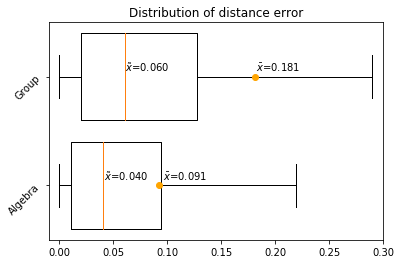

[array([[2.53492741],
       [2.09517968],
       [1.87920857],
       ...,
       [0.02552555],
       [0.06284555],
       [0.06263494]]), array([3.33093688e+00, 2.19995984e+00, 1.62935127e-03, ...,
       6.45118382e-03, 6.74495875e-03, 5.00030119e-02])]


In [588]:
# error distributions of representations

data = [data_aa, data_gg[::2,0]]
# print(data[0][0])
fig7, ax7 = plt.subplots(figsize=(6,4))
ax7.set_title('Distribution of distance error')
ax7.boxplot(data, vert=False, showfliers=False, widths=.8)
plt.xlim([-.01, 0.3])
plt.yticks([1,2], ["Algebra","Group"], rotation=45)

# means
plt.plot([0.09194952284153465],[1], "o", c="orange")
plt.plot(0.181476133946368,2,"o", c="orange")

plt.text(0.182,2.05,r'$\bar{x}$'+'=0.181',horizontalalignment='left')
plt.text(0.096,1.05,r'$\bar{x}$'+'=0.091',horizontalalignment='left')

0.040065755008446224
0.06047908826633018
# plt.plot([0.040065755008446224],[1], "o", c="orange")
# plt.plot(0.06047908826633018,2,"o", c="orange")

plt.text(0.061,2.05,r'$\tilde{x}$'+'=0.060',horizontalalignment='left')
plt.text(0.041,1.05,r'$\tilde{x}$'+'=0.040',horizontalalignment='left')

# 0.181476133946368
plt.show()
print(data)

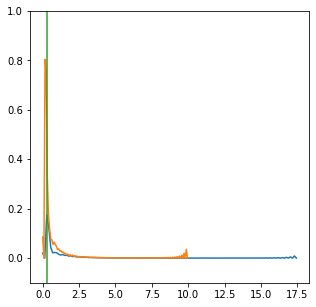

In [386]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
 
# frequnecy graph for each error
    
data = np.random.normal(10,3,300) #Generating data.
# print(data,data.shape)
plt.figure(figsize = (5,5))
sb.kdeplot(np.around(aa_a.flatten(),decimals=8) , bw = 0.0000001)
sb.kdeplot(np.around(gg_g.flatten(),decimals=8) , bw = 0.0000001)
# plt.xlim([-.25, 1])
plt.ylim([-0.1, 1])
plt.plot([.3,.3],[-1,1])
plt.show()

In [421]:
import matplotlib.pyplot as plt
import numpy as np

data_a = aa_a.flatten()
# print(data)
heights_a, bins_a = np.histogram(data_a, bins = 10000)
# print(heights,bins)
# print(sum(heights), len(heights))
sum_h = sum(heights)
percent_a = [i/sum_h*100 for i in heights_a]
# print(percent)

data_g = gg_g.flatten()
# print(data)
heights_g, bins_g = np.histogram(data_g, bins = 10000)
# print(heights,bins)
# print(sum(heights), len(heights))
sum_g = sum(heights_g)
percent_g = [i/sum_g*100 for i in heights_g]
# print(percent)

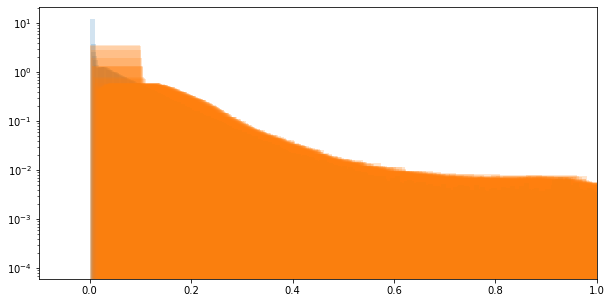

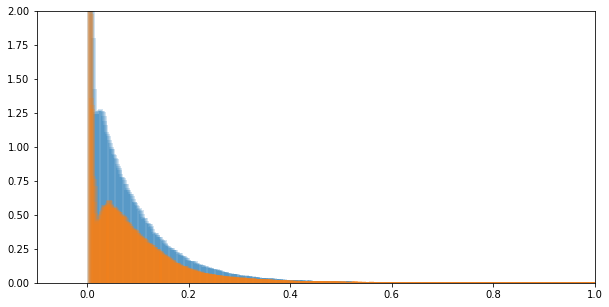

In [464]:
f, ax = plt.subplots(1, 1, figsize=(10,5))

# different frequency graph for errors using log scale

ax.bar(bins_a[:-1], percent_a, width=0.01, align="edge", alpha = 0.2)
ax.bar(bins_g[:-1], percent_g, width=0.1, align="edge", alpha = 0.2)
# vals = ax.get_yticks()
# ax.set_yticklabels(['%1.2f%%' %i for i in vals])
plt.xlim([-.1, 1])
ax.set_yscale('log')
plt.show()

f, ax = plt.subplots(1, 1, figsize=(10,5))

ax.bar(bins_a[:-1], percent_a, width=0.01, align="edge", alpha = 0.2)
ax.bar(bins_g[:-1], percent_g, width=0.01, align="edge", alpha = 0.2)
# vals = ax.get_yticks()
# ax.set_yticklabels(['%1.2f%%' %i for i in vals])
plt.xlim([-.1, 1])
# ax.set_yscale('log')
plt.ylim([0,2])
plt.show()

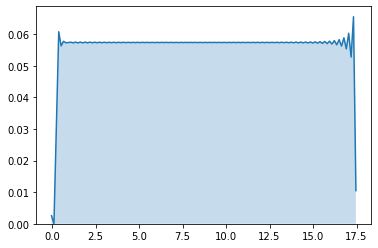

In [465]:
levi = pd.Series(bins_a[:-1],percent_a)
sb.kdeplot(levi, shade=True, bw=0.01)
plt.show()

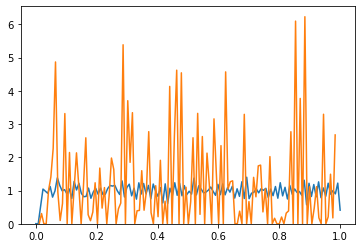

In [416]:
sb.kdeplot(np.random.random_sample(10000) , bw = 0.00001)
sb.kdeplot(np.random.random_sample(100) , bw = 0.00001)
plt.show()
# np.random.random_sample(1000)

In [244]:
np.argpartition(np.sum(aa_a, axis=2)[0],-10)

array([12, 29, 27, 24, 22, 17,  6,  1, 14,  7, 16, 19, 10, 13,  3,  8, 11,
       15,  2, 20,  4,  9, 25,  5, 28, 23, 26, 21, 18, 30,  0],
      dtype=int64)

In [250]:
np.argpartition(np.sum(aa_a, axis=2).T,-10)[0][-10:]

array([5976, 6257, 6253, 6432, 5164, 6431, 6455, 6260,  966, 1948],
      dtype=int64)

In [1]:
mot_1_best = np.argpartition(np.sum(aa_a, axis=2).T,-10)[0][-10:]
mot_1_worst = np.argpartition(np.sum(aa_a, axis=2).T,10)[0][:10]

NameError: name 'np' is not defined

In [272]:
aa_h[:,0][mot_1_best]
aa_h[mot_1_best][:,0*6:0*6+6].shape


(10, 6)

In [354]:
# best and worst motors for algebra rep
for i in range(10):
    test = aa_h[mot_1_best][:,0*6:0*6+6]
    d_a = test[i]

    rbm_a = d_a[0] * pga.e01 + d_a[1] * pga.e02+ d_a[2] * pga.e03 + d_a[3] * pga.e12 + d_a[4] * pga.e13 + d_a[5] * pga.e23
    mot_a = e**rbm_a

    # print(mot_a)
    print(rbm_a)

print()
for i in range(10):    
    test = aa_h[mot_1_worst][:,0*6:0*6+6]
    d_a = test[i]

    rbm_a = d_a[0] * pga.e01 + d_a[1] * pga.e02+ d_a[2] * pga.e03 + d_a[3] * pga.e12 + d_a[4] * pga.e13 + d_a[5] * pga.e23
    mot_a = e**rbm_a

    # print(mot_a)
    print(rbm_a)

(3.20272^e01) + (0.49355^e02) + (0.68594^e03) - (0.08643^e12) - (0.21923^e13) + (0.00923^e23)
(2.51575^e01) + (0.59843^e02) - (0.62504^e03) - (0.0127^e12) - (1.75966^e13) - (0.04053^e23)
(2.31316^e01) + (0.47219^e02) - (0.61887^e03) + (0.00248^e12) - (1.21212^e13) + (0.01747^e23)
(2.66626^e01) + (0.60149^e02) - (0.27574^e03) + (0.0817^e12) - (0.94584^e13) + (0.05384^e23)
(2.24526^e01) + (0.40034^e02) - (2.0128^e03) - (0.08021^e12) - (1.56636^e13) + (0.02058^e23)
(2.74261^e01) + (0.56439^e02) + (0.19558^e03) + (0.17034^e12) - (0.72246^e13) + (0.0069^e23)
(2.70789^e01) + (0.47645^e02) - (0.02892^e03) + (0.0009^e12) - (0.92794^e13) + (0.03879^e23)
(2.49901^e01) + (0.5357^e02) + (0.15973^e03) + (0.02028^e12) - (0.91529^e13) - (0.04059^e23)
(0.47029^e01) + (0.48831^e02) - (1.61848^e03) + (0.00546^e12) - (0.01419^e13) + (0.05884^e23)
(0.72479^e01) + (0.09706^e02) - (2.97026^e03) - (0.20152^e12) - (0.46935^e13) - (0.13304^e23)

(0.64623^e01) + (0.45985^e02) - (0.20223^e03) + (0.03483^e12) + (

In [355]:
mot_1_best = np.argpartition(np.sum(gg_g, axis=2).T,-10)[0][-10:]
mot_1_worst = np.argpartition(np.sum(gg_g, axis=2).T,10)[0][:10]

In [359]:
# The best and worst motors for group representations

for i in range(10):
    test = gg_h[mot_1_best][:,0*8:0*8+8]
    d_g = test[i]

    rbm_g = d_g[0] * 1 + d_g[1] * pga.e01 + d_g[2] * pga.e02 + d_g[3] * pga.e03 + d_g[4] * pga.e12 + d_g[5] * pga.e13 + d_g[6] * pga.e23 + d_g[7] * pga.e0123
    mot_a = e**rbm_g

    # print(mot_a)
    print(rbm_g)

print()
for i in range(10):    
    test = gg_h[mot_1_worst][:,0*8:0*8+8]
    d_g = test[i]

    rbm_g = d_g[0] * 1 + d_g[1] * pga.e01 + d_g[2] * pga.e02 + d_g[3] * pga.e03 + d_g[4] * pga.e12 + d_g[5] * pga.e13 + d_g[6] * pga.e23 + d_g[7] * pga.e0123
    mot_a = e**rbm_g

    # print(mot_a)
    print(rbm_g)

0.5155 - (0.1638^e01) + (0.26095^e02) - (0.59078^e03) - (0.00669^e12) - (0.27542^e13) - (0.00658^e23) + (0.17156^e0123)
0.61015 + (0.13379^e01) + (0.37777^e02) - (0.71174^e03) - (0.01318^e12) - (0.11515^e13) - (0.05445^e23) + (0.04396^e0123)
0.64958 + (0.29196^e01) + (0.32622^e02) - (0.7605^e03) - (0.02504^e12) - (0.10409^e13) - (0.00459^e23) + (0.05118^e0123)
0.60933 - (0.03526^e01) + (0.32822^e02) - (0.57419^e03) + (0.01311^e12) + (0.17502^e13) - (0.01034^e23) - (0.09915^e0123)
0.57162 - (0.05496^e01) + (0.28261^e02) - (0.59522^e03) - (0.01299^e12) - (0.08203^e13) - (0.02185^e23) + (0.04411^e0123)
0.65435 + (0.02178^e01) + (0.3595^e02) - (0.65608^e03) - (0.00297^e12) - (0.0117^e13) + (0.01259^e23) + (0.05417^e0123)
0.64486 - (0.04967^e01) + (0.36624^e02) - (0.58484^e03) - (0.00733^e12) + (0.01391^e13) - (0.00893^e23) - (0.02055^e0123)
0.65244 - (0.43875^e01) + (0.34739^e02) - (0.72879^e03) - (0.0293^e12) - (0.20051^e13) + (0.0606^e23) + (0.14089^e0123)
0.52204 + (0.4275^e01) + (0.241

In [294]:
m = np.sum(np.abs(gg_g),axis=2)
n = np.sum(m, axis=0)
l = np.median(m, axis=0)
# n.shape
# m[10]

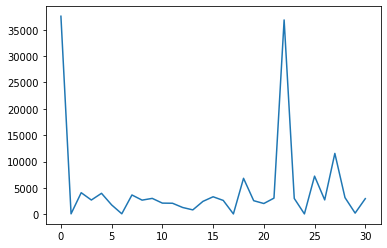

In [295]:
# sum and median error for group rep

plt.plot(n.T)

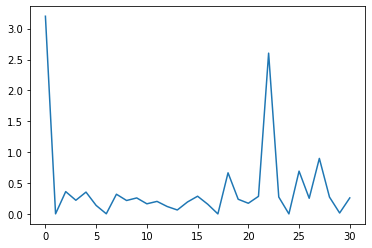

In [296]:
# sum and median error for group rep
plt.plot(l.T)

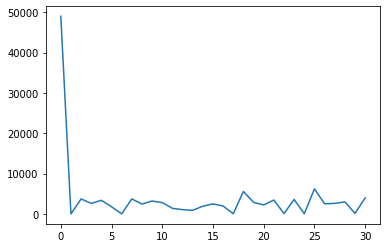

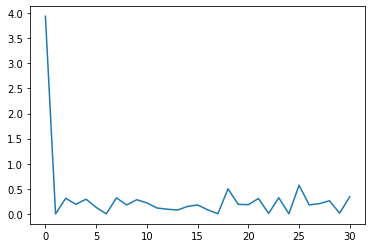

In [299]:
# sum and mediam error for algebra rep

m = np.sum(np.abs(aa_a),axis=2)
n = np.sum(m, axis=0)
l = np.median(m, axis=0)

plt.plot(n.T)
plt.show()
plt.plot(l.T)
plt.show()

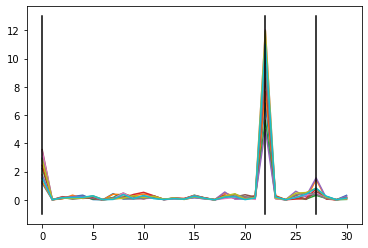

In [280]:
# the errors for each bone

plt.plot(m[:10].T)
plt.plot([0,0],[-1,13], c="black")
plt.plot([22,22],[-1,13], c="black")
plt.plot([27,27],[-1,13], c="black")

plt.show()

In [52]:
a_best = sum(aa_a < gg_g)
g_best = sum(aa_a > gg_g)


In [58]:
a_tot = np.sum(aa_a, axis=2)
g_tot = np.sum(gg_g, axis=2)

In [302]:
(a_tot-g_tot).shape

(10000, 31)

In [65]:
sum(a_tot<g_tot) > sum(a_tot>g_tot)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False])

In [205]:
bones[27]

'RIGHTHAND'

In [69]:
better_index = np.array([0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0])

In [20]:
bones = np.array(['HIPS', 'LHIPJOINT', 'LEFTUPLEG', 'LEFTLEG', 'LEFTFOOT', 'LEFTTOEBASE', 'RHIPJOINT', 'RIGHTUPLEG', 'RIGHTLEG', 'RIGHTFOOT', 'RIGHTTOEBASE', 'SPINE', 'SPINE1', 'SPINE2', 'NECK', 'NECK1', 'HEAD', 'LEFTSHOULDER', 'LEFTARM', 'LEFTFOREARM', 'LEFTHAND', 'LEFTFINGERBASE', 'LEFTHANDINDEX1', 'LTHUMB', 'RIGHTSHOULDER', 'RIGHTARM', 'RIGHTFOREARM', 'RIGHTHAND', 'RIGHTFINGERBASE', 'RIGHTHANDINDEX1', 'RTHUMB'])

In [72]:
# bones that are better for algebra
bones[better_index == 1]

array(['LHIPJOINT', 'LEFTUPLEG', 'LEFTLEG', 'LEFTFOOT', 'LEFTTOEBASE',
       'RHIPJOINT', 'RIGHTUPLEG', 'RIGHTLEG', 'SPINE', 'SPINE1', 'NECK',
       'NECK1', 'HEAD', 'LEFTSHOULDER', 'LEFTARM', 'LEFTFOREARM',
       'LEFTHANDINDEX1', 'RIGHTSHOULDER', 'RIGHTARM', 'RIGHTFOREARM',
       'RIGHTHAND', 'RIGHTFINGERBASE', 'RIGHTHANDINDEX1'], dtype='<U15')

In [73]:
bones[better_index == 0]

array(['HIPS', 'RIGHTFOOT', 'RIGHTTOEBASE', 'SPINE2', 'LEFTHAND',
       'LEFTFINGERBASE', 'LTHUMB', 'RTHUMB'], dtype='<U15')

In [44]:
# implementation for saving and reconstructing more than 2d numpy arrays

aa_a_re = aa_a.reshape(aa_a.shape[0], -1)
np.savetxt("test.txt", aa_a_re)
  
loaded_aa_a = np.loadtxt("test.txt")
  
load_original_aa_a = loaded_aa_a.reshape(
    loaded_aa_a.shape[0], loaded_aa_a.shape[1] // aa_a.shape[2], aa_a.shape[2])
  
print(aa_a.shape)
print(load_original_aa_a.shape)


shape of arr:  (10000, 31, 3)
shape of load_original_arr:  (10000, 31, 3)
Yes, both the arrays are same


In [74]:
#algebra jitter
aa_y_j = jitter(aa_y)
aa_h_j = jitter(aa_h)

In [75]:
# group jitter
gg_y_j = jitter(gg_y)
gg_h_j = jitter(gg_h)

In [145]:
# print(np.array(aa_y_j)[:,1])
# print(np.array(aa_h_j)[:,1])

# print(np.array(gg_y_j)[:,1])
# print(np.array(gg_h_j)[:,1])

p_aa = np.array(aa_h_j)[:,1]/np.array(aa_y_j)[:,1]
p_gg = np.array(gg_h_j)[:,1]/np.array(gg_y_j)[:,1]

C:\Users\levik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys
C:\Users\levik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
C:\Users\levik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
C:\Users\levik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
C:\Users\levik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [596]:
# amount of parameters
len(aa_h_j)

186

In [155]:
# ratio of jitter compared to original

print(np.sum(np.array(aa_h_j)[:,1]))
print(np.sum(np.array(aa_y_j)[:,1]))
print(np.sum(np.array(gg_h_j)[:,1]))
print(np.sum(np.array(gg_y_j)[:,1]))

aaaa=np.sum(np.array(aa_h_j)[:,1])
aaa=np.sum(np.array(aa_y_j)[:,1])
gggg=np.sum(np.array(gg_h_j)[:,1])
ggg=np.sum(np.array(gg_y_j)[:,1])

print(aaaa/aaa)
print(gggg/ggg)

1156231
271932
1544978
365175
4.251912242766574
4.2307879783665365


In [603]:
# ratio per motor

for j in range(31):
    print()
    print(j)
    print()
    for i in range(6):
        aaaa=np.sum(np.array(aa_h_j)[i,1])
        aaa=np.sum(np.array(aa_y_j)[i,1])
        gggg=np.sum(np.array(gg_h_j)[i+1,1])
        ggg=np.sum(np.array(gg_y_j)[i+1,1])
        print()
        print(i)
        print(aaaa/aaa)
        print(gggg/ggg)


0


0
5.645655877342419
6.137511693171188

1
3.0416666666666665
3.9292869770182675

2
5.620050547598989
5.326876513317191

3
2.8465835840137514
2.8139633886760325

4
4.768613138686131
4.802941176470588

5
2.643979057591623
2.678123736352608

1


0
5.645655877342419
6.137511693171188

1
3.0416666666666665
3.9292869770182675

2
5.620050547598989
5.326876513317191

3
2.8465835840137514
2.8139633886760325

4
4.768613138686131
4.802941176470588

5
2.643979057591623
2.678123736352608

2


0
5.645655877342419
6.137511693171188

1
3.0416666666666665
3.9292869770182675

2
5.620050547598989
5.326876513317191

3
2.8465835840137514
2.8139633886760325

4
4.768613138686131
4.802941176470588

5
2.643979057591623
2.678123736352608

3


0
5.645655877342419
6.137511693171188

1
3.0416666666666665
3.9292869770182675

2
5.620050547598989
5.326876513317191

3
2.8465835840137514
2.8139633886760325

4
4.768613138686131
4.802941176470588

5
2.643979057591623
2.678123736352608

4


0
5.645655877342419
6.13751

In [143]:
# mean ratio of zero cross

print(np.nanmean(p_gg))
print(np.nanmean(p_aa))

0.2531788159378957
0.23680577686935927


In [140]:
# Experimentation with origin and triangles for motor evaluation

origin = (1*pga.e0).dual()

test = 1*pga.e0 + 0.8*pga.e1 + -0.1*pga.e2 + 0.1*pga.e3
print(test)
test = test.dual()
print(test)

test1 = 1*pga.e0 - 0.8*pga.e1 + -0.1*pga.e2 + 0.1*pga.e3
print(test1)
test1 = test1.dual()
print(test1)

(1.0^e0) + (0.8^e1) - (0.1^e2) + (0.1^e3)
-(0.1^e012) - (0.1^e013) - (0.8^e023) + (1.0^e123)
(1.0^e0) - (0.8^e1) - (0.1^e2) + (0.1^e3)
-(0.1^e012) - (0.1^e013) + (0.8^e023) + (1.0^e123)


In [98]:
a = (1*pga.e0 + .5*pga.e1 + 0*pga.e2 + 0*pga.e3).dual()
b = (1*pga.e0 + 0*pga.e1 + .5*pga.e2 + 0*pga.e3).dual()
c = (1*pga.e0 + 0*pga.e1 + 0*pga.e2 + .5*pga.e3).dual()


In [101]:
mot = e**(1*pga.e02)

In [102]:
test1 = mot*test*~mot
origin1 = mot*origin*~mot

In [111]:
kk = origin.normal().vee(origin1.normal())
kk

(2.0^e13)

In [112]:
origin.normal().vee(origin1.normal())

(2.0^e13)

In [113]:
np.sqrt(sum([q ** 2 for q in kk])) # distance

2.0

In [114]:
print([q ** 2 for q in kk])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(2.0^e13)

In [109]:
origin

(1.0^e123)

In [110]:
origin1

-(2.0^e013) + (1.0^e123)

In [96]:
joep = (1 + origin/origin1).normal()

In [97]:
l1 = origin1.vee(test1)
l2 = origin1.vee(joep*test)

joep = (1 + l1/l2).normal() * joep

In [ ]:
p1 = L1.vee()

In [316]:
# mean per motor parameter
np.mean(aa_y, axis=0)

array([ 1.27318293e-01,  4.24659900e-01, -1.63049322e-01,  1.62824152e-02,
       -1.47749780e-01, -3.07050706e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.92928476e-02, -3.90020927e-02,  1.61147535e-02,  1.72207979e-01,
       -6.08597387e-02,  1.78490508e-01,  6.19122131e-02, -1.70102586e-01,
        6.74982672e-02,  5.00000000e-09,  1.20058628e-01, -3.29858465e-01,
        6.40887910e-02, -1.93096790e-01, -2.75318203e-02, -3.61408264e-02,
        6.76127010e-02,  1.65073056e-01,  6.37949850e-03, -1.75277596e-02,
        5.90157738e-02, -6.50300000e-07, -9.93717560e-03,  2.73021700e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.70955224e-02, -3.90165677e-02,
        1.58775216e-02, -1.84172729e-01,  5.77132634e-02,  1.91186983e-01,
       -6.17849164e-02, -1.69752877e-01,  7.07841682e-02,  3.29000000e-08,
       -1.25797228e-01, -

In [333]:
# sort index by largest error
print(np.argpartition(np.mean(aa_y, axis=0),-20)[-20:])


[ 99 167 130  89 120  22   0 171 160 159 154  15  17 142  29 114 111   1
  47  59]
0 126 156


In [ ]:
x`